# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Project (Raisin_Class_Prediction)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

**Data Set Information:**

https://www.researchgate.net/publication/347934123_Classification_of_Raisin_Grains_Using_Machine_Vision_and_Artificial_Intelligence_Methods

**Data Set Information:**

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


**Attribute Information:**

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://www.researchgate.net/publication/347934123_Classification_of_Raisin_Grains_Using_Machine_Vision_and_Artificial_Intelligence_Methods

# <font color='green'> <b>Exploratory Data Analysis (EDA) and Visualization</b><font color='black'>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [4]:
df = pd.read_excel("Raisin_Dataset.xlsx")  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.shape

(900, 8)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [8]:
df["Class"].value_counts() 

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

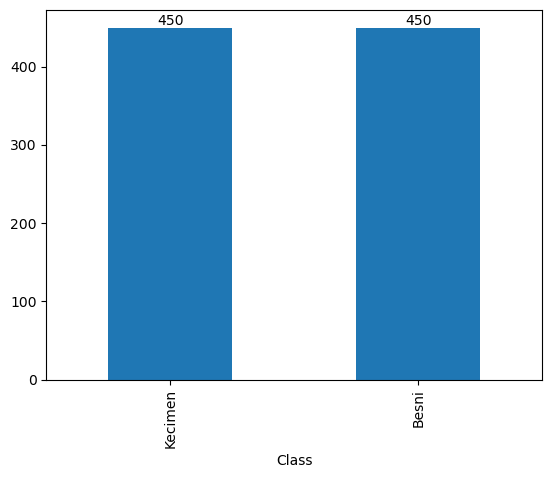

In [9]:
ax = df["Class"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]); 

# balanced bir data
# balanced datalarda hangi skora bakabiliriz?

In [10]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) 

# Kecimeni 0 Besniyi 1 olacak şekilde mapledik
# Bu şekilde yapmasak da olurdu, direkt isimler ile de tahmin alabiliriz

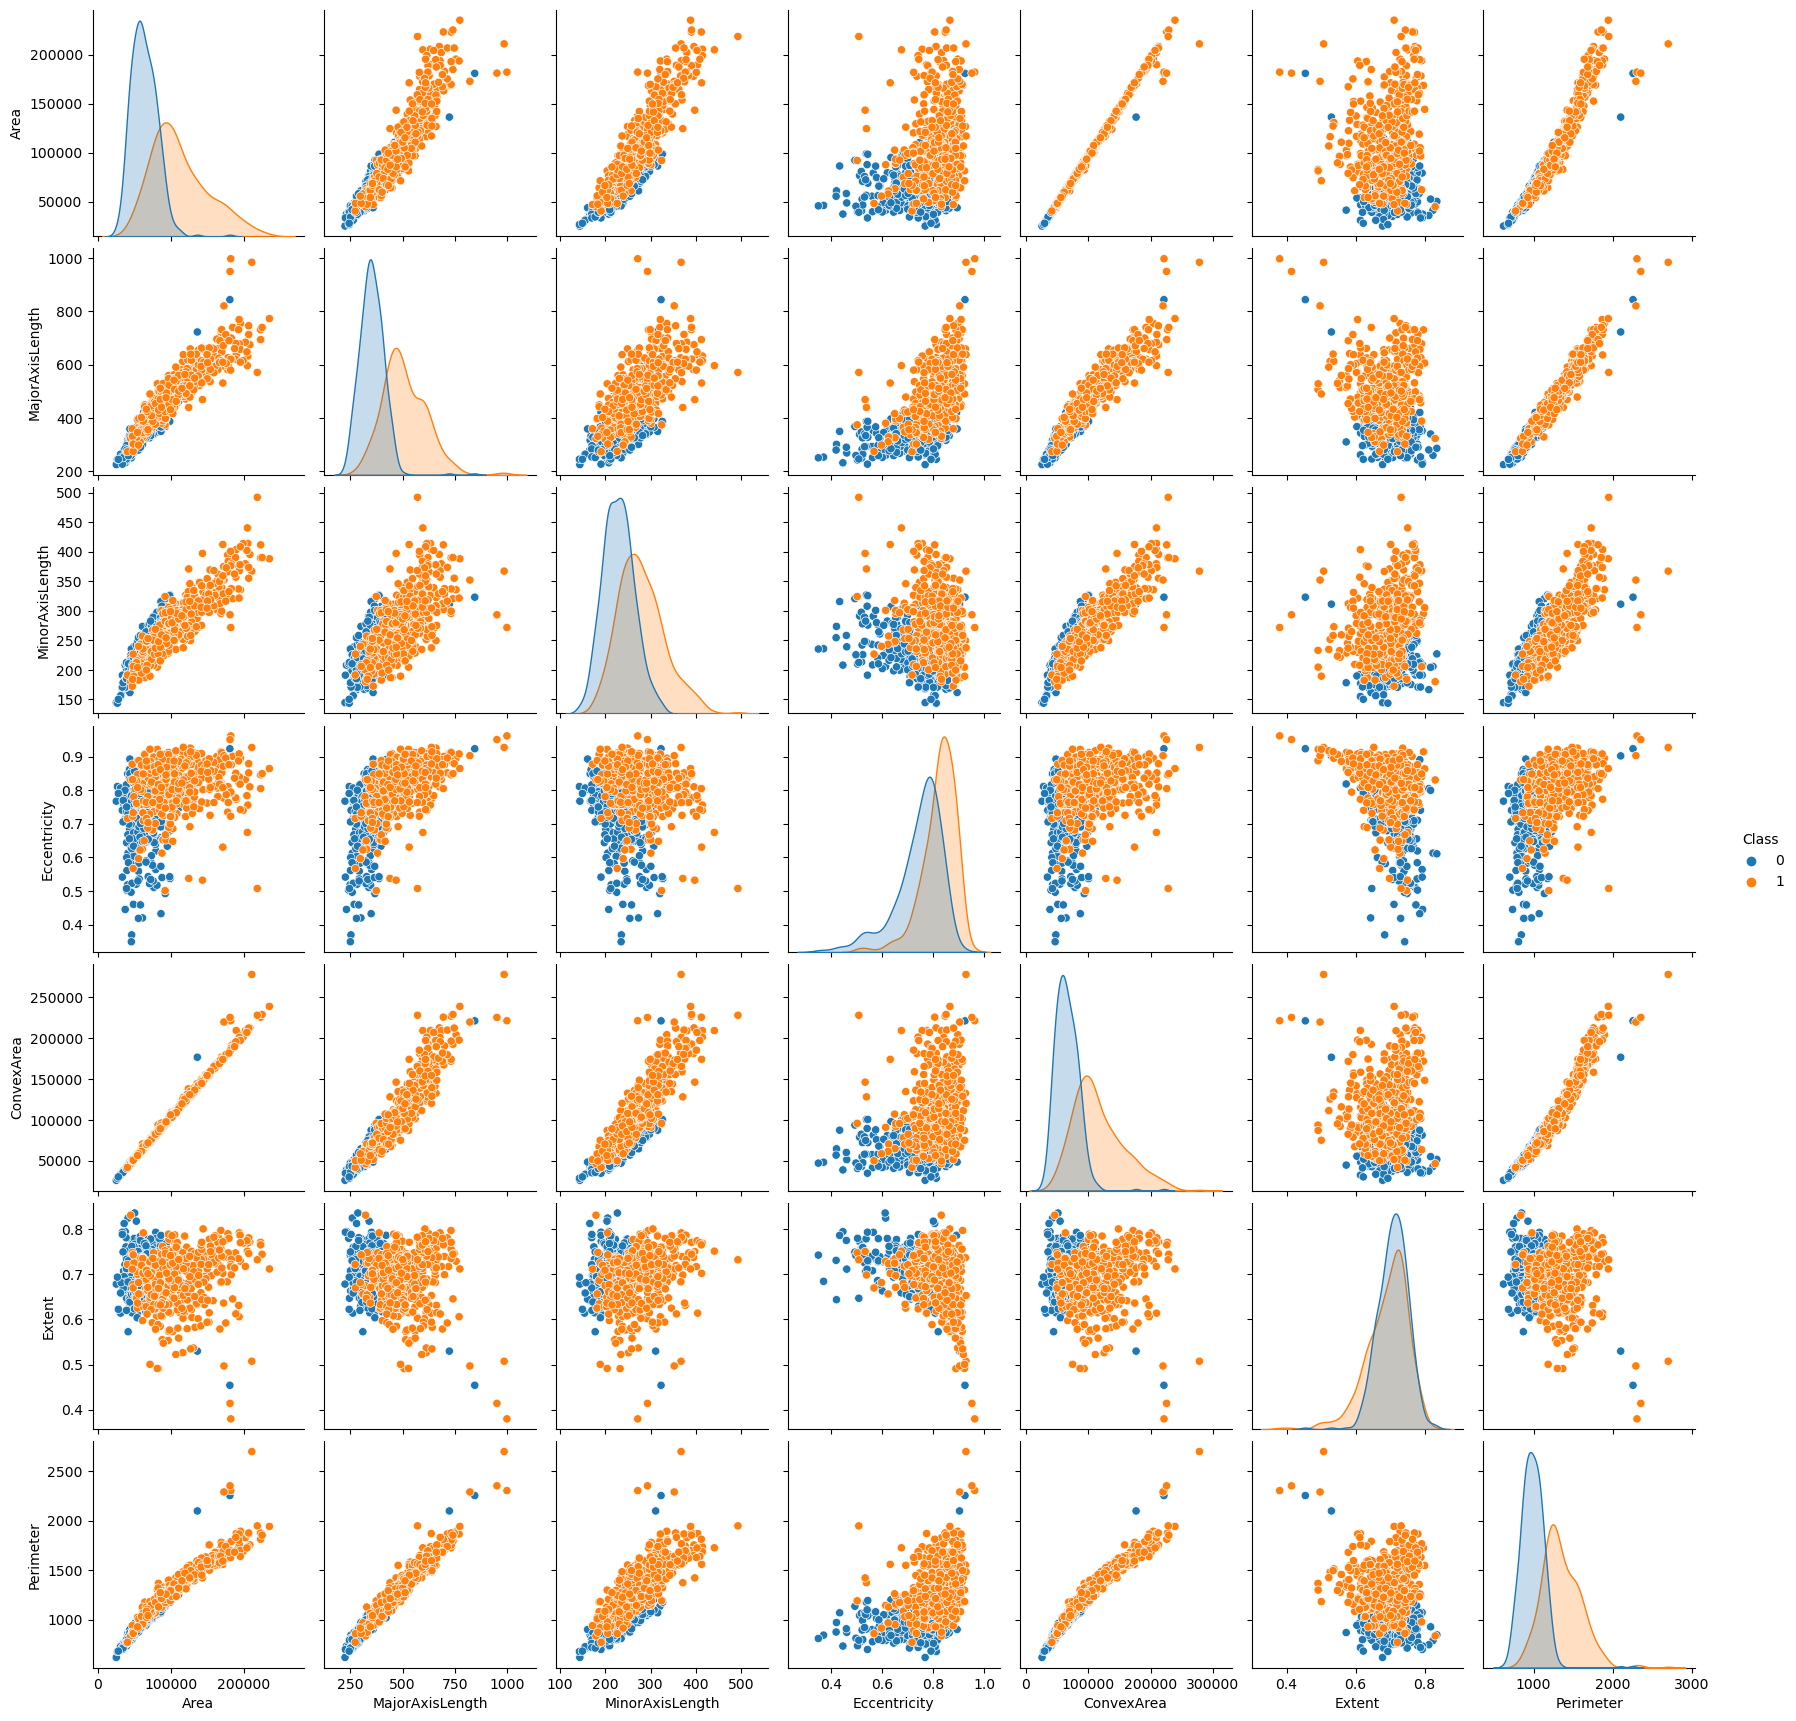

In [11]:
sns.pairplot(df, hue = "Class");

# classların birbirinden net bir şekilde ayrıştığı yer göremiyorum

# <font color='green'> <b>Logistic Regression Model</b><font color='black'>

## <font color='blue'> <b>Train | Test Split and Scaling</b><font color='black'>

In [12]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [13]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                        
                                                    random_state=101)

## <font color='blue'> <b>Logistic Regression with Pipeline</b><font color='black'>

In [15]:
scaler = StandardScaler()

In [16]:
log_model = LogisticRegression()

In [17]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) 
# once scaler yapilacak sonra log model secilecek.Sirasi onemli

In [18]:
log_pipe.fit(X_train, y_train ) #sadece train kismi fit edilir, leakage den protect etmek icin

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [19]:
y_pred = log_pipe.predict(X_test)
y_pred
# olusturulan ve egitilen lop pipe i (slope vs ogrendi), X_testi verecek y sini predict yapmaya calistik.

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [20]:
y_pred_proba = log_pipe.predict_proba(X_test) 
#hangi olasiliklarla bu prediction i yaptigini gosterecek, besni ve kecimen tek tek
y_pred_proba [:,1].round(2) # "," sag tarfi sutunlar-column, sol tarafi row

array([0.24, 0.74, 1.  , 0.78, 0.89, 0.1 , 0.89, 0.17, 0.62, 0.52, 0.97,
       0.52, 0.72, 0.64, 0.08, 0.26, 0.03, 0.04, 0.21, 0.38, 0.06, 0.95,
       1.  , 1.  , 0.11, 0.77, 0.68, 0.99, 0.11, 0.03, 0.05, 0.98, 0.94,
       0.09, 0.07, 0.99, 0.02, 0.76, 0.33, 0.14, 0.21, 0.84, 0.56, 0.34,
       0.99, 0.99, 0.84, 1.  , 0.98, 0.14, 1.  , 0.72, 0.61, 0.79, 0.26,
       0.12, 0.14, 0.29, 0.81, 0.94, 0.03, 0.86, 0.28, 0.07, 0.78, 0.18,
       0.97, 0.07, 0.62, 1.  , 0.15, 0.15, 0.09, 0.32, 0.58, 0.27, 0.71,
       0.07, 1.  , 0.45, 0.2 , 0.05, 0.28, 0.03, 0.08, 0.07, 0.29, 0.1 ,
       0.04, 0.26, 0.13, 0.98, 0.02, 0.05, 0.11, 0.16, 0.13, 1.  , 0.09,
       0.97, 0.66, 0.11, 0.46, 0.32, 0.68, 0.18, 0.3 , 0.13, 0.36, 0.05,
       0.99, 0.99, 0.47, 0.82, 0.03, 0.87, 0.97, 0.13, 0.06, 0.08, 0.14,
       0.15, 1.  , 0.48, 0.1 , 0.06, 0.84, 0.93, 0.96, 1.  , 0.28, 0.2 ,
       0.65, 0.98, 0.19, 0.52, 0.76, 0.89, 0.1 , 0.47, 0.15, 0.66, 0.13,
       0.1 , 0.79, 0.15, 0.03, 0.09, 1.  , 0.04, 0.

## <font color='blue'> <b>X_test + y_yest + y_pred + y_pred_proba</b><font color='black'>

In [21]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred # modelimizin tahmin ettigi
test_data["pred_proba"] = y_pred_proba[:,1] #kac olailikla tahmin ettigi
test_data.sample (20)
#class= target

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
331,53497,352.502752,194.981137,0.833093,54875,0.691176,921.762,0,0,0.153226
182,63968,333.012421,247.888546,0.667754,65403,0.757000,953.445,0,0,0.089491
287,68129,381.175490,230.056020,0.797330,70141,0.659704,1050.867,0,0,0.326268
818,95364,481.564373,253.846781,0.849785,97623,0.737952,1225.352,1,1,0.786639
361,49039,285.402087,220.819901,0.633534,50879,0.714771,841.666,0,0,0.034532
56,57127,311.644578,238.641921,0.643138,59943,0.693626,952.023,0,0,0.083901
799,90675,426.236425,275.287073,0.763460,92030,0.740107,1163.021,1,1,0.519978
439,98485,387.762836,325.737166,0.542521,100682,0.729865,1193.908,0,0,0.356670
682,106923,591.115838,234.823346,0.917709,111428,0.522279,1425.109,1,1,0.986191
138,53758,359.531612,193.400877,0.842993,57197,0.710295,965.068,0,0,0.207375


## <font color='blue'> <b>Model Performance</b><font color='black'>

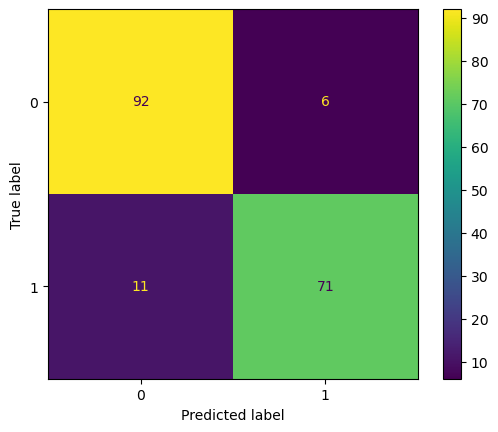

In [22]:
ConfusionMatrixDisplay.from_estimator(log_pipe , X_test , y_test);

In [23]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# hem train hem de test seti scorlarını gözlemleyebilmek için eval_metric fornksiyonumuzu tanımlıyoruz.

In [24]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

# 1 label'ı için konuşacak olursak. 
# precision 0.89 demek yaptığım tahminlerin %89'ü isabetli anlamına geliyor.

# recall 0.84 demek gerçekte 1 olan classların %84'ini doğru tespit ettim anlamına geliyor.

# f1 score, precision ve recall scorlarının harmonic ortalmasını verdiğinden hedef metriğinize (recall, precision)
# göre yorumlanması gerekir. Tek başına yorumlanması yanlış yorumlanmaya sebep verir.

# Datada overfiting olup olmadığı hedef classın test ve train scorları karşılaştırılarak karar verilir. 
# Train setinin scorları test datasından çok daha iyi ise arada uçurum var ise overfiting var demektir.

# Ancak datanın genelindeki train ve test datasına bakarak overfiting/underfiting kararı vermiyoruz. Kesin overfiting 
# underfiting kararını cross_validation sonrası vereceğiz.

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[309  43]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [25]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [29]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.008455,0.032333,0.812500,0.884375,0.702703,0.854985,0.753623,0.869432,0.763889,0.868827
2,0.016506,0.016779,0.914286,0.873817,0.864865,0.836858,0.888889,0.854938,0.888889,0.854938
3,0.016234,0.016248,0.833333,0.880126,0.810811,0.842900,0.821918,0.861111,0.819444,0.861111
4,0.016431,0.016571,0.871795,0.873016,0.918919,0.830816,0.894737,0.851393,0.888889,0.851852
5,0.025051,0.016516,0.937500,0.876972,0.810811,0.839879,0.869565,0.858025,0.875000,0.858025
6,0.017710,0.016532,0.864865,0.878981,0.864865,0.833837,0.864865,0.855814,0.861111,0.856481
7,0.023541,0.016336,0.914286,0.874214,0.864865,0.839879,0.888889,0.856703,0.888889,0.856481
8,0.015522,0.025201,0.846154,0.879747,0.891892,0.839879,0.868421,0.859351,0.861111,0.859568
9,0.015938,0.016311,0.909091,0.874608,0.833333,0.840361,0.869565,0.857143,0.875000,0.856481
10,0.010391,0.014691,0.882353,0.874608,0.833333,0.840361,0.857143,0.857143,0.861111,0.856481


In [30]:
df_scores.mean()[2:]  

test_precision     0.878616
train_precision    0.877046
test_recall        0.839640
train_recall       0.839976
test_f1            0.857761
train_f1           0.858105
test_accuracy      0.858333
train_accuracy     0.858025
dtype: float64

In [31]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[309  43]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [32]:
log_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('log_model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'log_model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log_model__C': 1.0,
 'log_model__class_weight': None,
 'log_model__dual': False,
 'log_model__fit_intercept': True,
 'log_model__intercept_scaling': 1,
 'log_model__l1_ratio': None,
 'log_model__max_iter': 100,
 'log_model__multi_class': 'auto',
 'log_model__n_jobs': None,
 'log_model__penalty': 'l2',
 'log_model__random_state': None,
 'log_model__solver': 'lbfgs',
 'log_model__tol': 0.0001,
 'log_model__verbose': 0,
 'log_model__warm_start': False}

In [33]:
model = Pipeline([("scaler", scaler), ("log_model", log_model)])
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C, 1],  # hata alan alanlar "log_model__C" : C, yapsınlar
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}

# en iyi modeli elde etmek için
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',   
    n_jobs=-1) 


In [34]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [35]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': None,
 'log_model__penalty': 'l2',
 'log_model__solver': 'lbfgs'}

In [36]:
grid_model.best_index_

28

In [37]:
grid_model.best_score_

0.8583333333333332

In [38]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[309  43]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



## <font color='blue'> <b>Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>

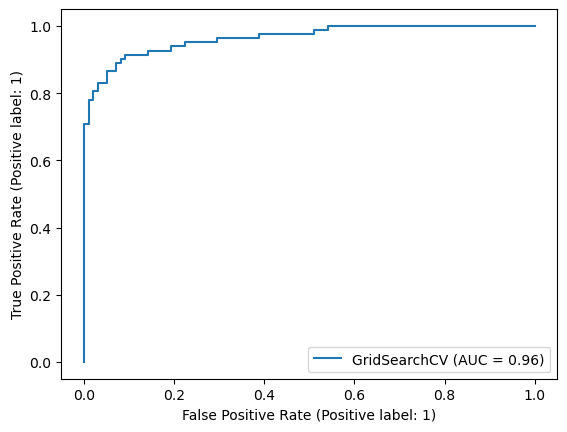

In [39]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

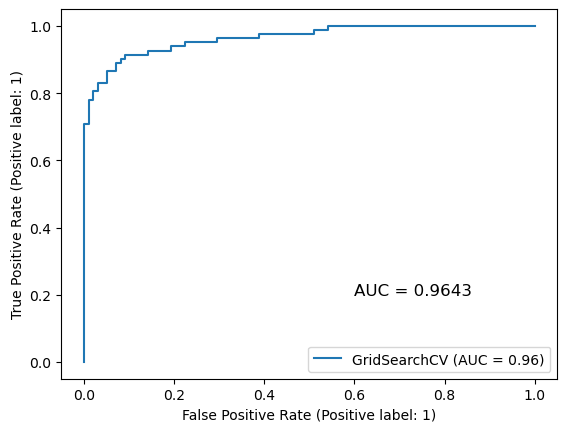

In [40]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

plt.text(0.6, 0.2, f'AUC = {auc:.4f}', fontsize=12)
plt.show()

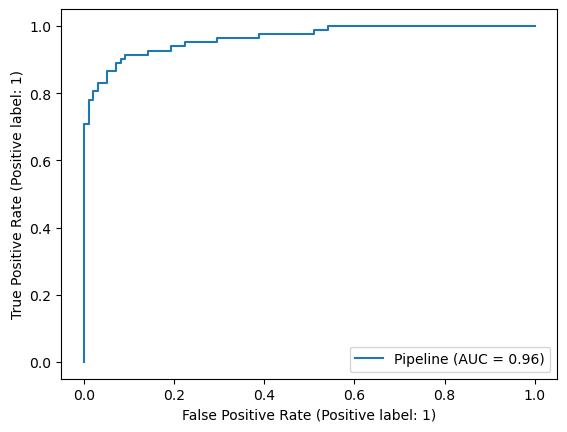

In [41]:
RocCurveDisplay.from_estimator(log_pipe, X_test, y_test);

# <font color='green'> <b>Prediction</b><font color='black'>

In [47]:
new_data = pd.read_excel("Raisin_Dataset_new.xlsx") 

In [48]:
final_scaler = StandardScaler()
final_model = LogisticRegression()

In [49]:
final_pipe = Pipeline([("scaler", final_scaler), ("log_model", final_model)])

In [50]:
final_pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [51]:
predictions = final_pipe.predict(new_data)


In [52]:
positive_class_proba = final_pipe.predict_proba(new_data)[:, 1]

In [53]:
results = pd.DataFrame({
    'Tahmin': predictions,
    'Pozitif Sınıf Olasılığı': positive_class_proba
})

results


,Tahmin,Pozitif Sınıf Olasılığı
0,1,0.651376
1,0,0.132203
2,0,0.086283
3,0,0.024742
4,0,0.123196
5,1,0.572805
6,1,0.743543
7,1,0.728312
8,1,0.863969
9,1,0.938375


# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |